In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house_df_org = pd.read_csv('house_train.csv') # org: 원본

In [3]:
house_df_org.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [4]:
house_df = house_df_org.copy() # 데이터 가공할 거라서 copy본 만듦
house_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_df.dtypes.value_counts() 

object     43
int64      35
float64     3
dtype: int64

In [7]:
isnull_series = house_df.isnull().sum().sort_values(ascending=False)

In [8]:
isnull_series[isnull_series>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

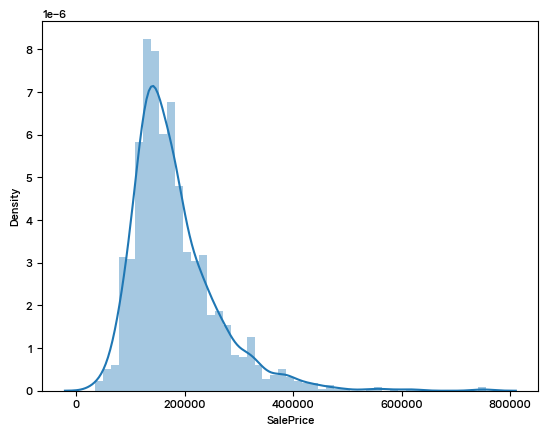

In [9]:
sns.distplot(house_df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

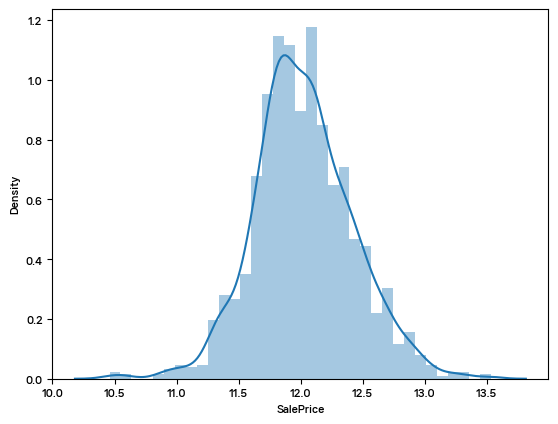

In [10]:
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [11]:
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [12]:
house_df.drop(columns=['Id', 'PoolQC','MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],
              inplace=True)

In [13]:
house_df.fillna(house_df.mean(),inplace=True)

In [14]:
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]

In [15]:
null_column_count

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [16]:
house_df.dtypes[null_column_count.index]

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

In [17]:
house_df.shape

(1460, 75)

In [18]:
house_df_ohe = pd.get_dummies(house_df)

In [19]:
house_df_ohe.shape

(1460, 271)

In [20]:
house_df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 271 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(33), uint8(234)
memory usage: 755.8 KB


In [21]:
house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum()>0]

Series([], dtype: int64)

In [22]:
# 평가에 쓸 함수
def get_rmse(model):
    from sklearn.metrics import mean_squared_error # metrics: 평가와 관련한 것 있음
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE: ', rmse)
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [24]:
y = house_df_ohe['SalePrice']
X = house_df_ohe.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=156)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE:  0.13189576579154072
Ridge 로그 변환된 RMSE:  0.12750846334053154
Lasso 로그 변환된 RMSE:  0.17628250556471395


[0.13189576579154072, 0.12750846334053154, 0.17628250556471395]

In [25]:
# 하이퍼 파라미터: 모델링할 때 사용자가 직접 세팅해주는 값
# 회귀 계수가 커지는 것을 방지하기 위해 alpha 조절

In [26]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_,index=X.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [27]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24,10),ncols=3,nrows=1)
    fig.tight_layout()
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[i_num].set_title(model.__class__.__name__,size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=-128)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])

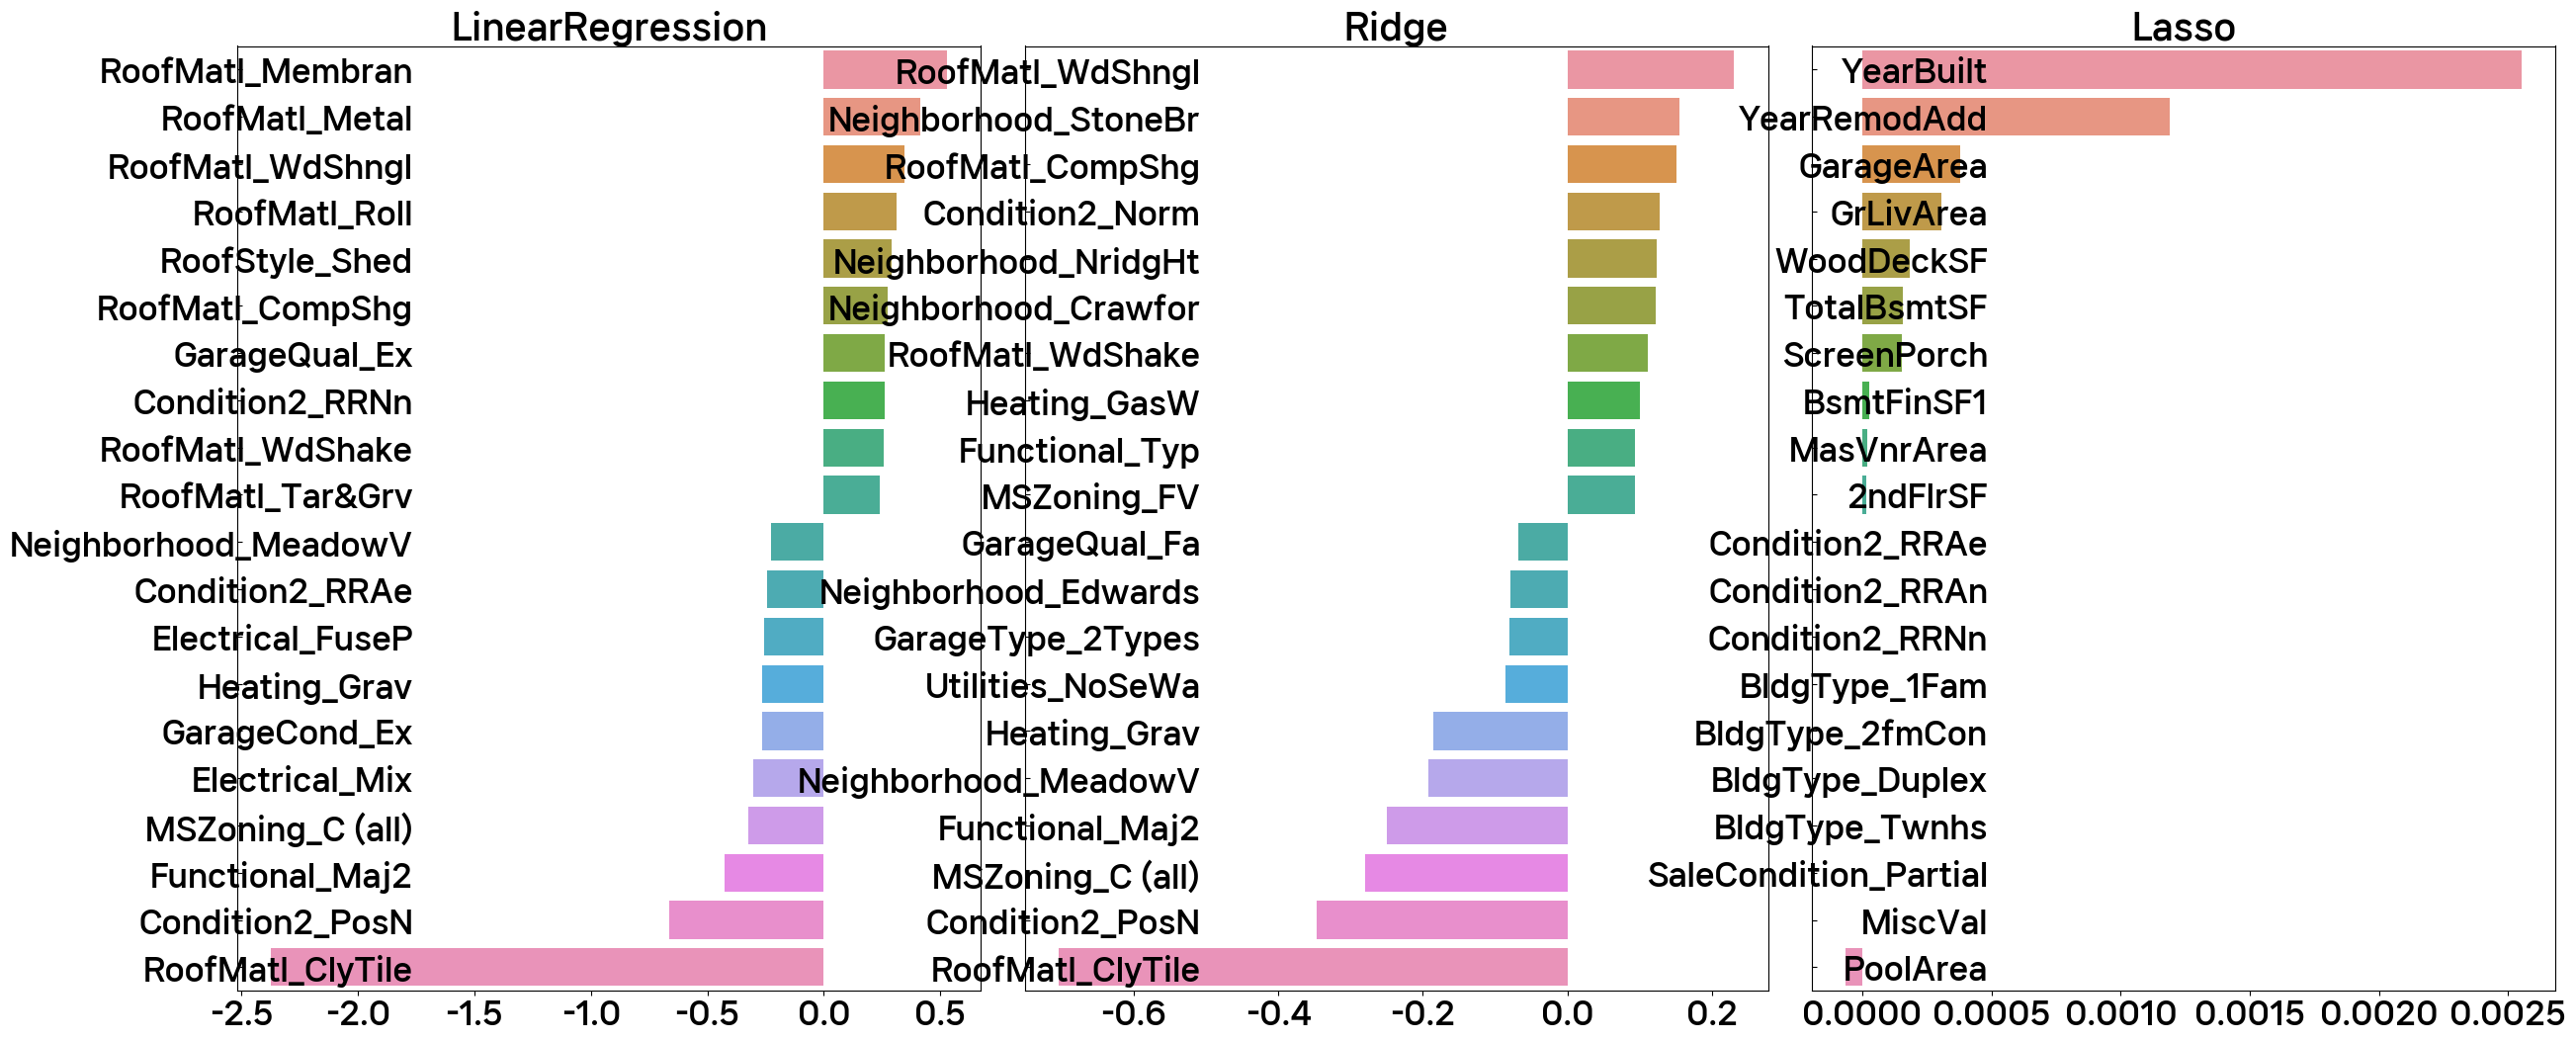

In [28]:
plt.rcParams['axes.unicode_minus'] = False
models=[lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [29]:
# 전체 데이터 세트인 X_features와 y_target을 5개의 교차 검증 폴드 세트로 분할해 평균 RMSE를 측정-> cross_val_score

In [30]:
def get_avg_rmse_cv(models):
    from sklearn.model_selection import cross_val_score
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,
                                             X,
                                             y,
                                             scoring='neg_mean_squared_error',
                                             cv = 5)) # 분류는 큰 값, 회귀는 작은 값이 좋음
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} rmse 값 리스트: {rmse_list}')
        print(f'{model.__class__.__name__} rmse 값 평  균: {rmse_avg}')

In [31]:
models=[lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)
# LinearRegression 로그 변환된 RMSE:  0.13189576579154072
# Ridge 로그 변환된 RMSE:  0.12750846334053154
# Lasso 로그 변환된 RMSE:  0.17628250556471395

LinearRegression rmse 값 리스트: [0.13532312 0.16457906 0.167651   0.11089677 0.19808115]
LinearRegression rmse 값 평  균: 0.15530621901706115
Ridge rmse 값 리스트: [0.11725334 0.15439419 0.14208945 0.11652709 0.18898702]
Ridge rmse 값 평  균: 0.14385021807917392
Lasso rmse 값 리스트: [0.16077499 0.20437243 0.17676683 0.18127643 0.2651206 ]
Lasso rmse 값 평  균: 0.1976622573181429


In [32]:
def print_best_params(model, params):
    from sklearn.model_selection import GridSearchCV
    grid_model = GridSearchCV(model,
                              param_grid = params,
                              scoring = 'neg_mean_squared_error',
                              cv = 5)
    grid_model.fit(X,y)
    rmse = np.sqrt(-grid_model.best_score_)
    print(f'최적 rmse:{rmse}, 최적 alpha:{grid_model.best_params_}')

In [33]:
ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

최적 rmse:0.14176729913304334, 최적 alpha:{'alpha': 12}
최적 rmse:0.14198359088571505, 최적 alpha:{'alpha': 0.001}


In [34]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
# LinearRegression 로그 변환된 RMSE:  0.13189576579154072
# Ridge 로그 변환된 RMSE:  0.12750846334053154
# Lasso 로그 변환된 RMSE:  0.17628250556471395

LinearRegression 로그 변환된 RMSE:  0.13189576579154072
Ridge 로그 변환된 RMSE:  0.12387044279987358
Lasso 로그 변환된 RMSE:  0.11995999974065162


[0.13189576579154072, 0.12387044279987358, 0.11995999974065162]

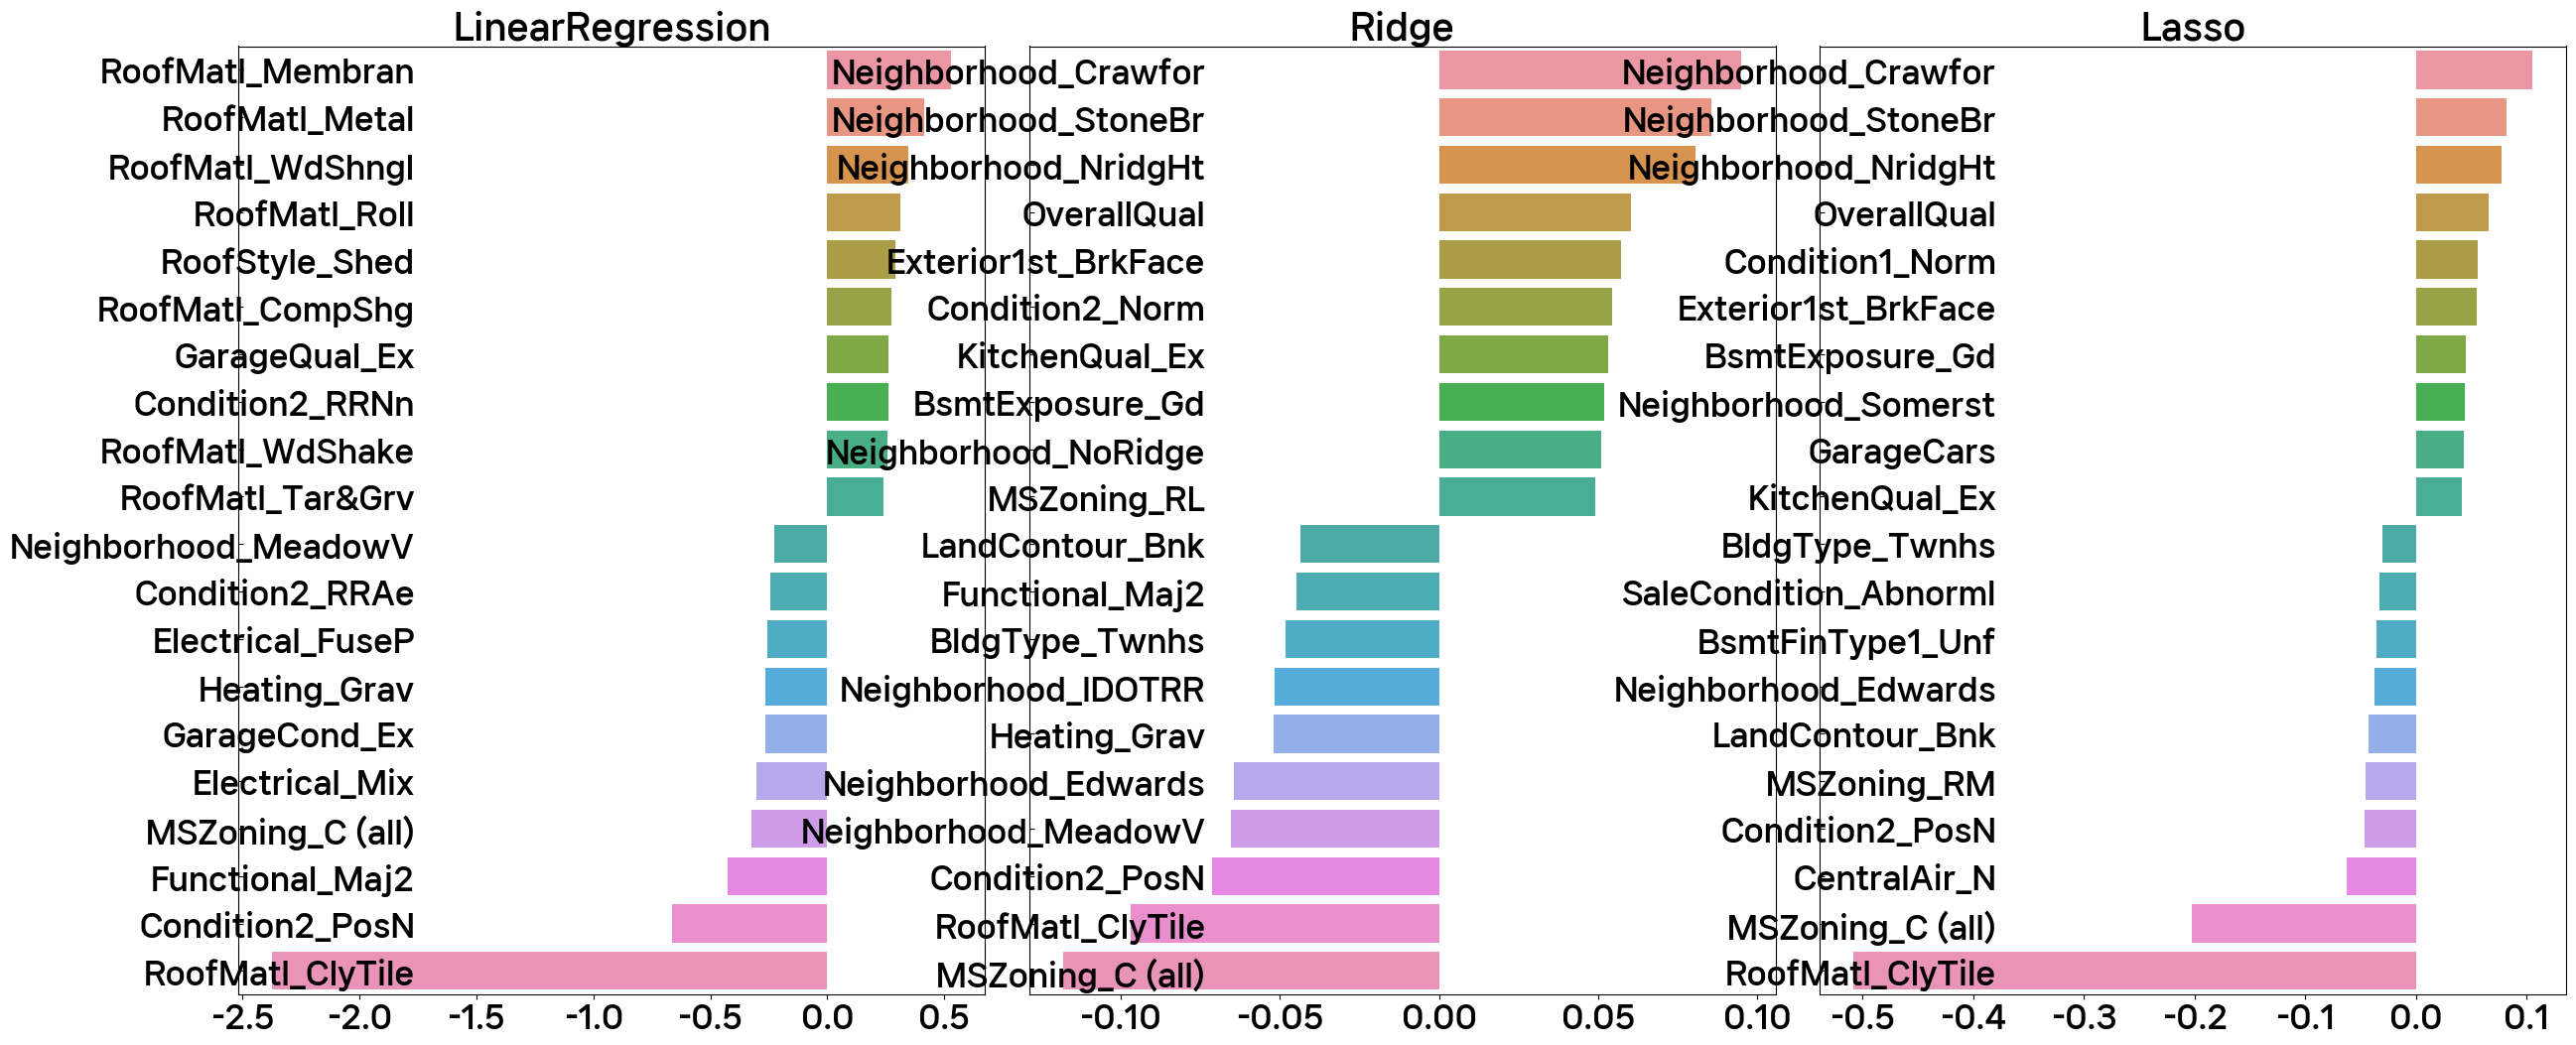

In [35]:
models=[lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [36]:
# 데이터 세트를 추가적으로 가공해서 모델 튜닝 -피처 데이터 세트의 데이터 분포도 / 이상치 데이터 처리로 

In [37]:
# 회귀 계수가 높다는 것은 결과값에 많은 영향 미침

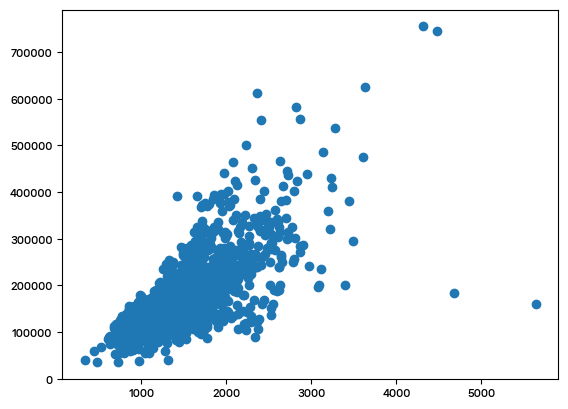

In [38]:
plt.scatter(x = house_df_org['GrLivArea'],y=house_df_org['SalePrice']) # 가격에 로그 처리해서 원본을 봄

In [39]:
# 이상치(아웃라이어) 제거

In [40]:
cond1 = house_df_ohe['GrLivArea'] > 4000 # 로그 처리 안 된 값
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000) # 로그 처리된 값

In [41]:
outlier_index = house_df_ohe[cond1 & cond2].index

In [42]:
outlier_index

Int64Index([523, 1298], dtype='int64')

In [43]:
house_df_ohe.shape

(1460, 271)

In [44]:
house_df_ohe.drop(index=outlier_index,inplace=True)

In [45]:
house_df_ohe.shape

(1458, 271)

In [46]:
y = house_df_ohe['SalePrice']
X = house_df_ohe.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=156)
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()


ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

최적 rmse:0.11413122076804948, 최적 alpha:{'alpha': 15}
최적 rmse:0.1136287058798075, 최적 alpha:{'alpha': 0.001}


In [47]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=15)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
# LinearRegression 로그 변환된 RMSE:  0.13189576579154072
# Ridge 로그 변환된 RMSE:  0.12387044279987358
# Lasso 로그 변환된 RMSE:  0.11995999974065162

LinearRegression 로그 변환된 RMSE:  0.1282537684463086
Ridge 로그 변환된 RMSE:  0.10271076726751315
Lasso 로그 변환된 RMSE:  0.10164576101982135


[0.1282537684463086, 0.10271076726751315, 0.10164576101982135]

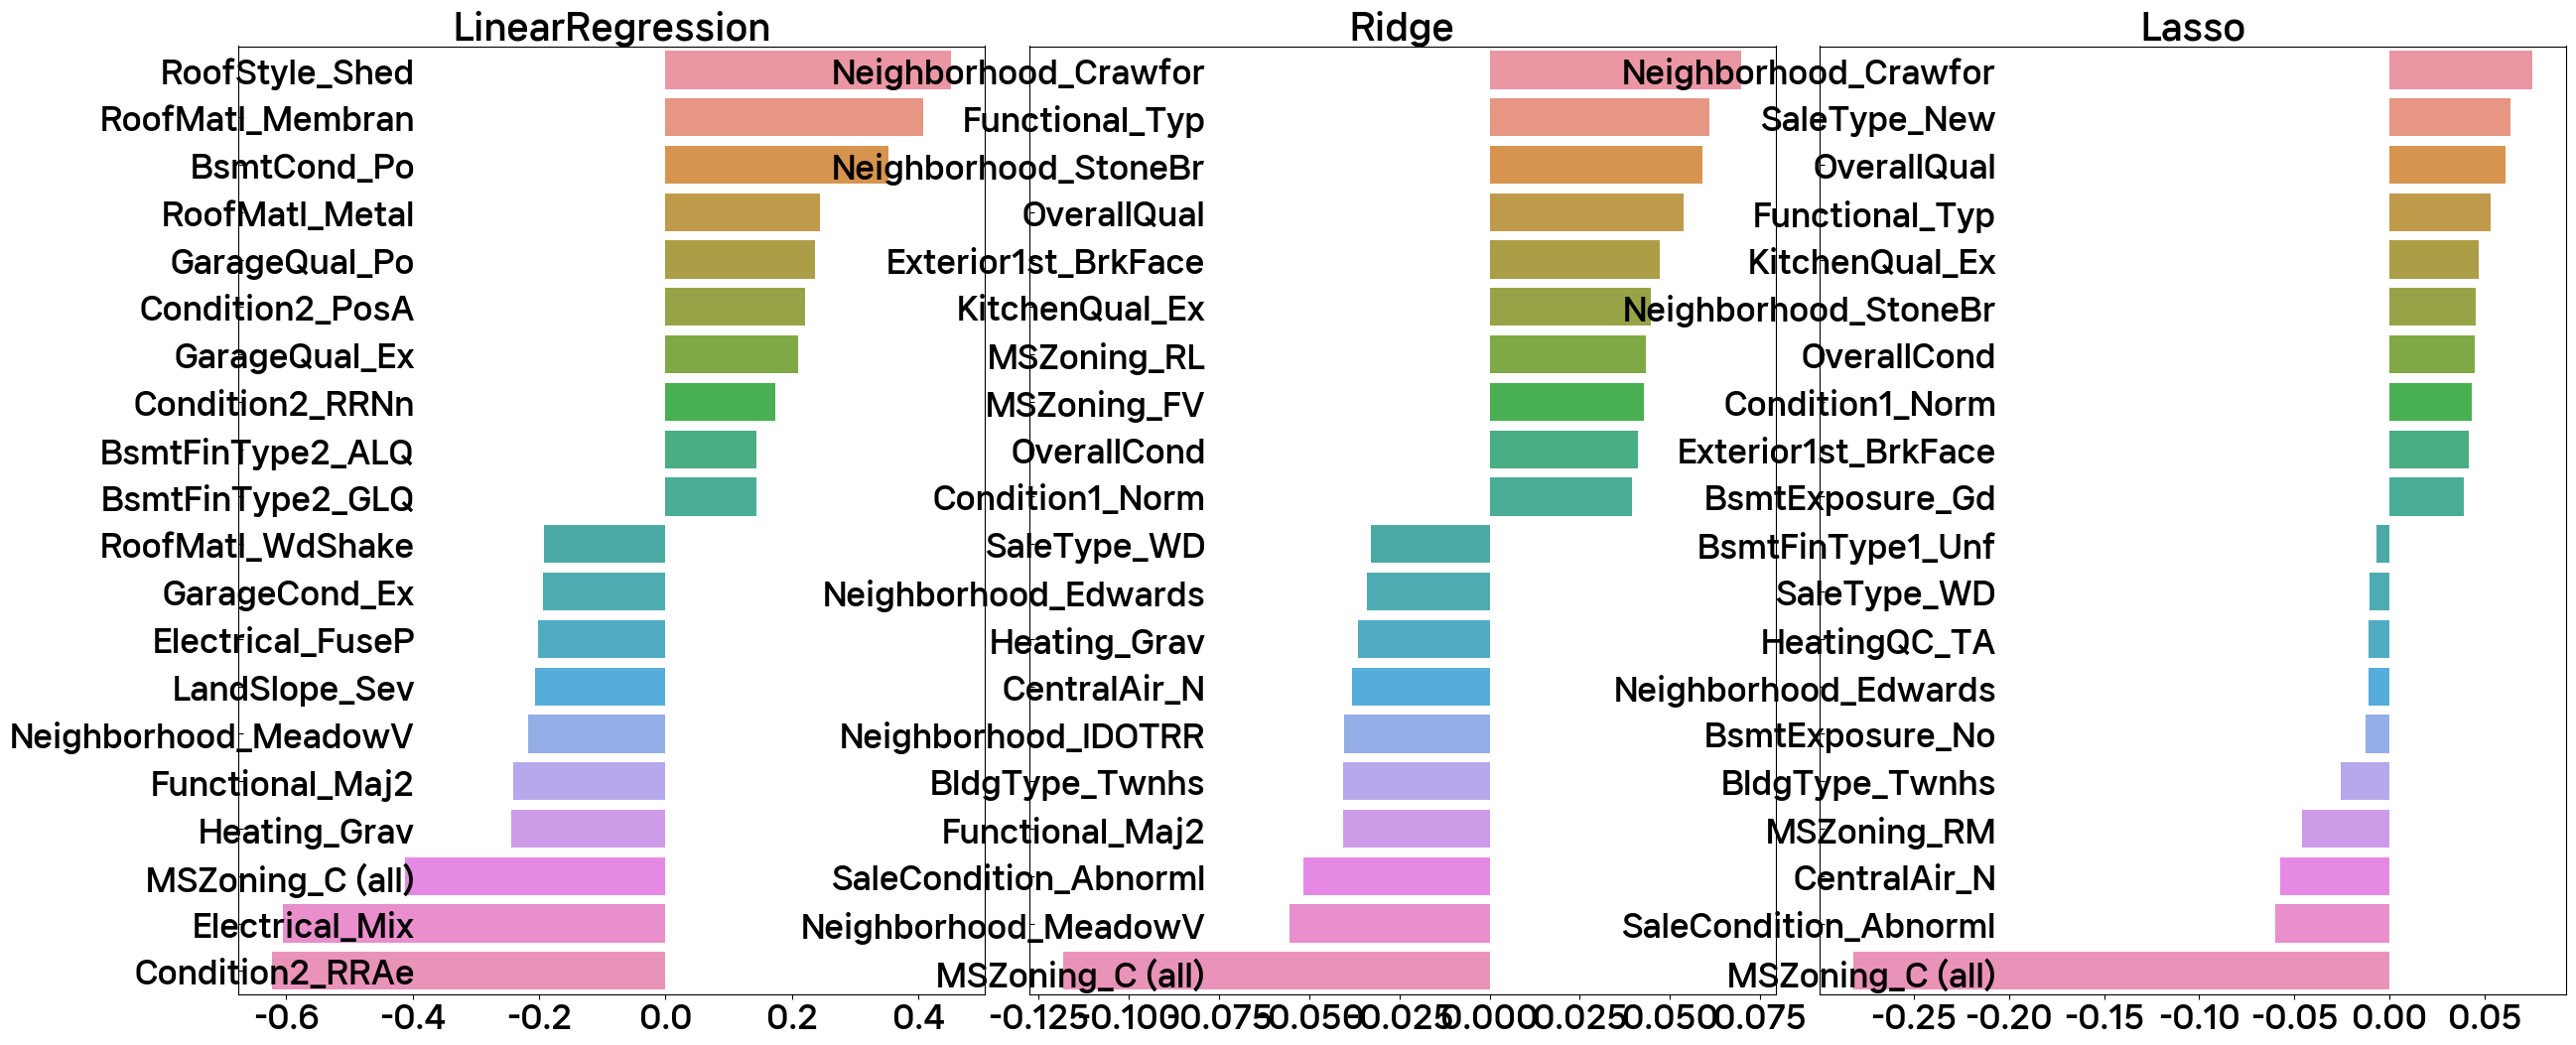

In [48]:
models=[lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)